# <font color = 'blue'>SURVIVAL PREDICTION ON TITANIC DATASET</font>

## Enoch A. Akinpelu (PhD, CEng, MIChemE)


# Objectives:

- To carry out an exploratory data analysis on titanic dataset.
- To predict either passenger survive or not using Decision Tree Classifier with focus on passenger class, sex, age and fare.
- To build a predictive system.
- To calculate the accuracy score.
- To represent and display findings on a confusion matrix.
- To display the findings on a decision tree as well as text representation.
- To present the classification report.

## Importing important dependencies

In [1]:
# Data wrangling libraries
import numpy as np
import pandas as pd 

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree

## Data Collection and processing

In [2]:
titanic=pd.read_csv('titanic dataset.csv')

## Exploratory Data Analysis

In [3]:
# Peruse the first 5 rows
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
# Shape of the data
titanic.shape

(418, 12)

### <font color = 'red'>There 418 rows and 12 columns in the titanic dataset</font>

In [5]:
# More information about the data
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [6]:
# Columns in the data
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
# Null values in the data
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### <font color = 'red'>There are null values in Age, Fare, and Cabin columns</font>

In [8]:
# Statistical details of the data
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
# Correlation of the data
titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.023245,-0.026751,-0.034102,0.003818,0.043080,0.008211
Survived,-0.023245,1.000000,-0.108615,-0.000013,0.099943,0.159120,0.191514
Pclass,-0.026751,-0.108615,1.000000,-0.492143,0.001087,0.018721,-0.577147
Age,-0.034102,-0.000013,-0.492143,1.000000,-0.091587,-0.061249,0.337932
SibSp,0.003818,0.099943,0.001087,-0.091587,1.000000,0.306895,0.171539
Parch,0.043080,0.159120,0.018721,-0.061249,0.306895,1.000000,0.230046
Fare,0.008211,0.191514,-0.577147,0.337932,0.171539,0.230046,1.000000


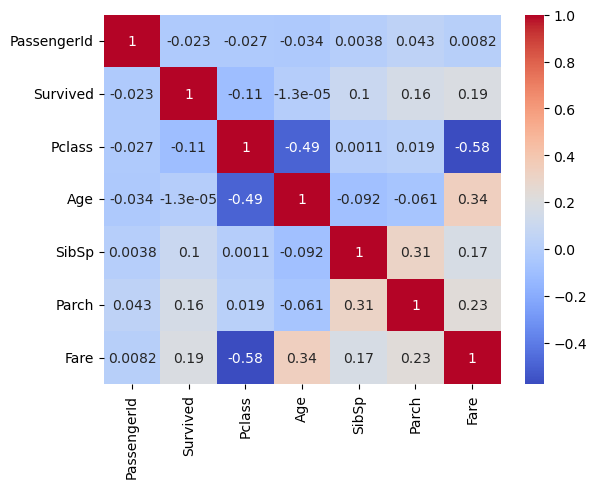

In [10]:
# Visual display of the data
sns.heatmap(titanic.corr(), annot=True, cmap='coolwarm');

### <font color = 'red'>There are no correlations among the data</font>

In [11]:
# Check for any replication
titanic.duplicated().sum()

0

### <font color='red'>There are no duplicate values in the data</font>

In [12]:
# Check unique values in sex column
titanic['Sex'].unique()

array(['male', 'female'], dtype=object)

In [13]:
# count number of each sex
titanic['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

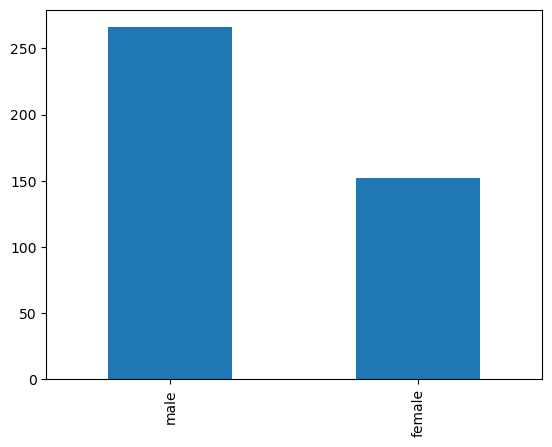

In [14]:
# visual display of sex distribution
titanic['Sex'].value_counts().plot(kind='bar');

In [15]:
# Check unique values in survivor column
titanic['Survived'].unique()

array([0, 1], dtype=int64)

In [16]:
# Count number of those that or that does not survived
titanic['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

Note:
0=Dead
1=Alive

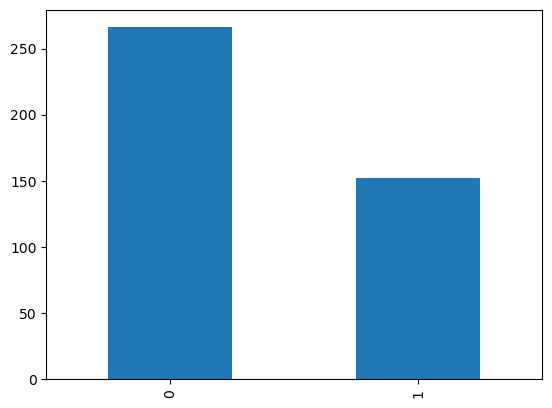

In [17]:
# visual display of survival
titanic['Survived'].value_counts().plot(kind='bar');

In [18]:
# Check unique vakues in Passenger Class
titanic['Pclass'].unique()

array([3, 2, 1], dtype=int64)

In [19]:
# Count the number of passenger in each class
titanic['Pclass'].value_counts()

3    218
1    107
2     93
Name: Pclass, dtype: int64

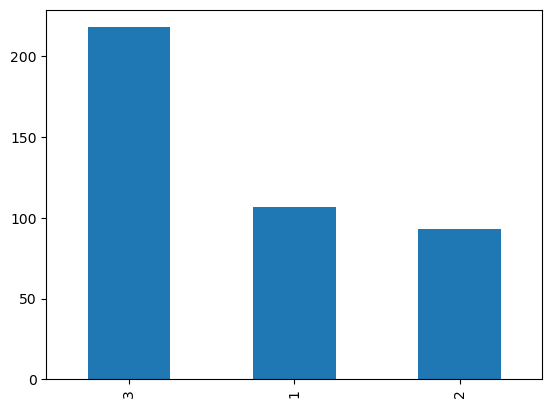

In [20]:
# visual display of passenger class
titanic['Pclass'].value_counts().plot(kind='bar');

In [21]:
# Check unique values in Parch column
titanic['Parch'].unique()

array([0, 1, 3, 2, 4, 6, 5, 9], dtype=int64)

In [22]:
# Count the number in each Parch
titanic['Parch'].value_counts()

0    324
1     52
2     33
3      3
4      2
9      2
6      1
5      1
Name: Parch, dtype: int64

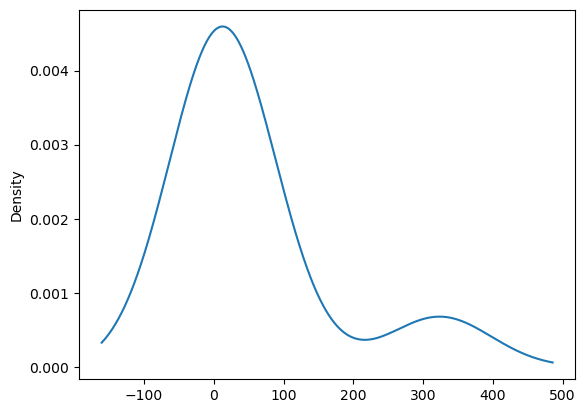

In [23]:
# visual distribution of parch
titanic['Parch'].value_counts().plot(kind='density');

In [24]:
# count the number for each age
titanic['Age'].value_counts()

21.0    17
24.0    17
22.0    16
30.0    15
18.0    13
        ..
76.0     1
28.5     1
22.5     1
62.0     1
38.5     1
Name: Age, Length: 79, dtype: int64

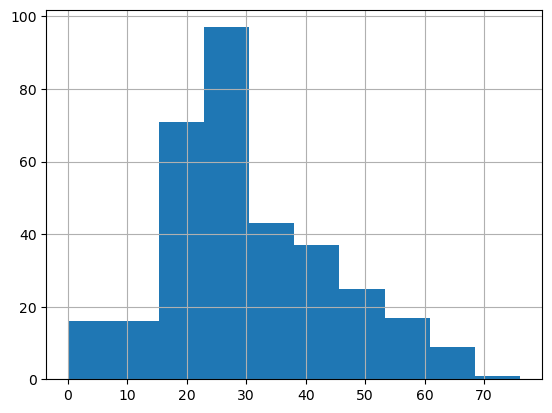

In [25]:
# visual display of age distribution
titanic['Age'].hist();

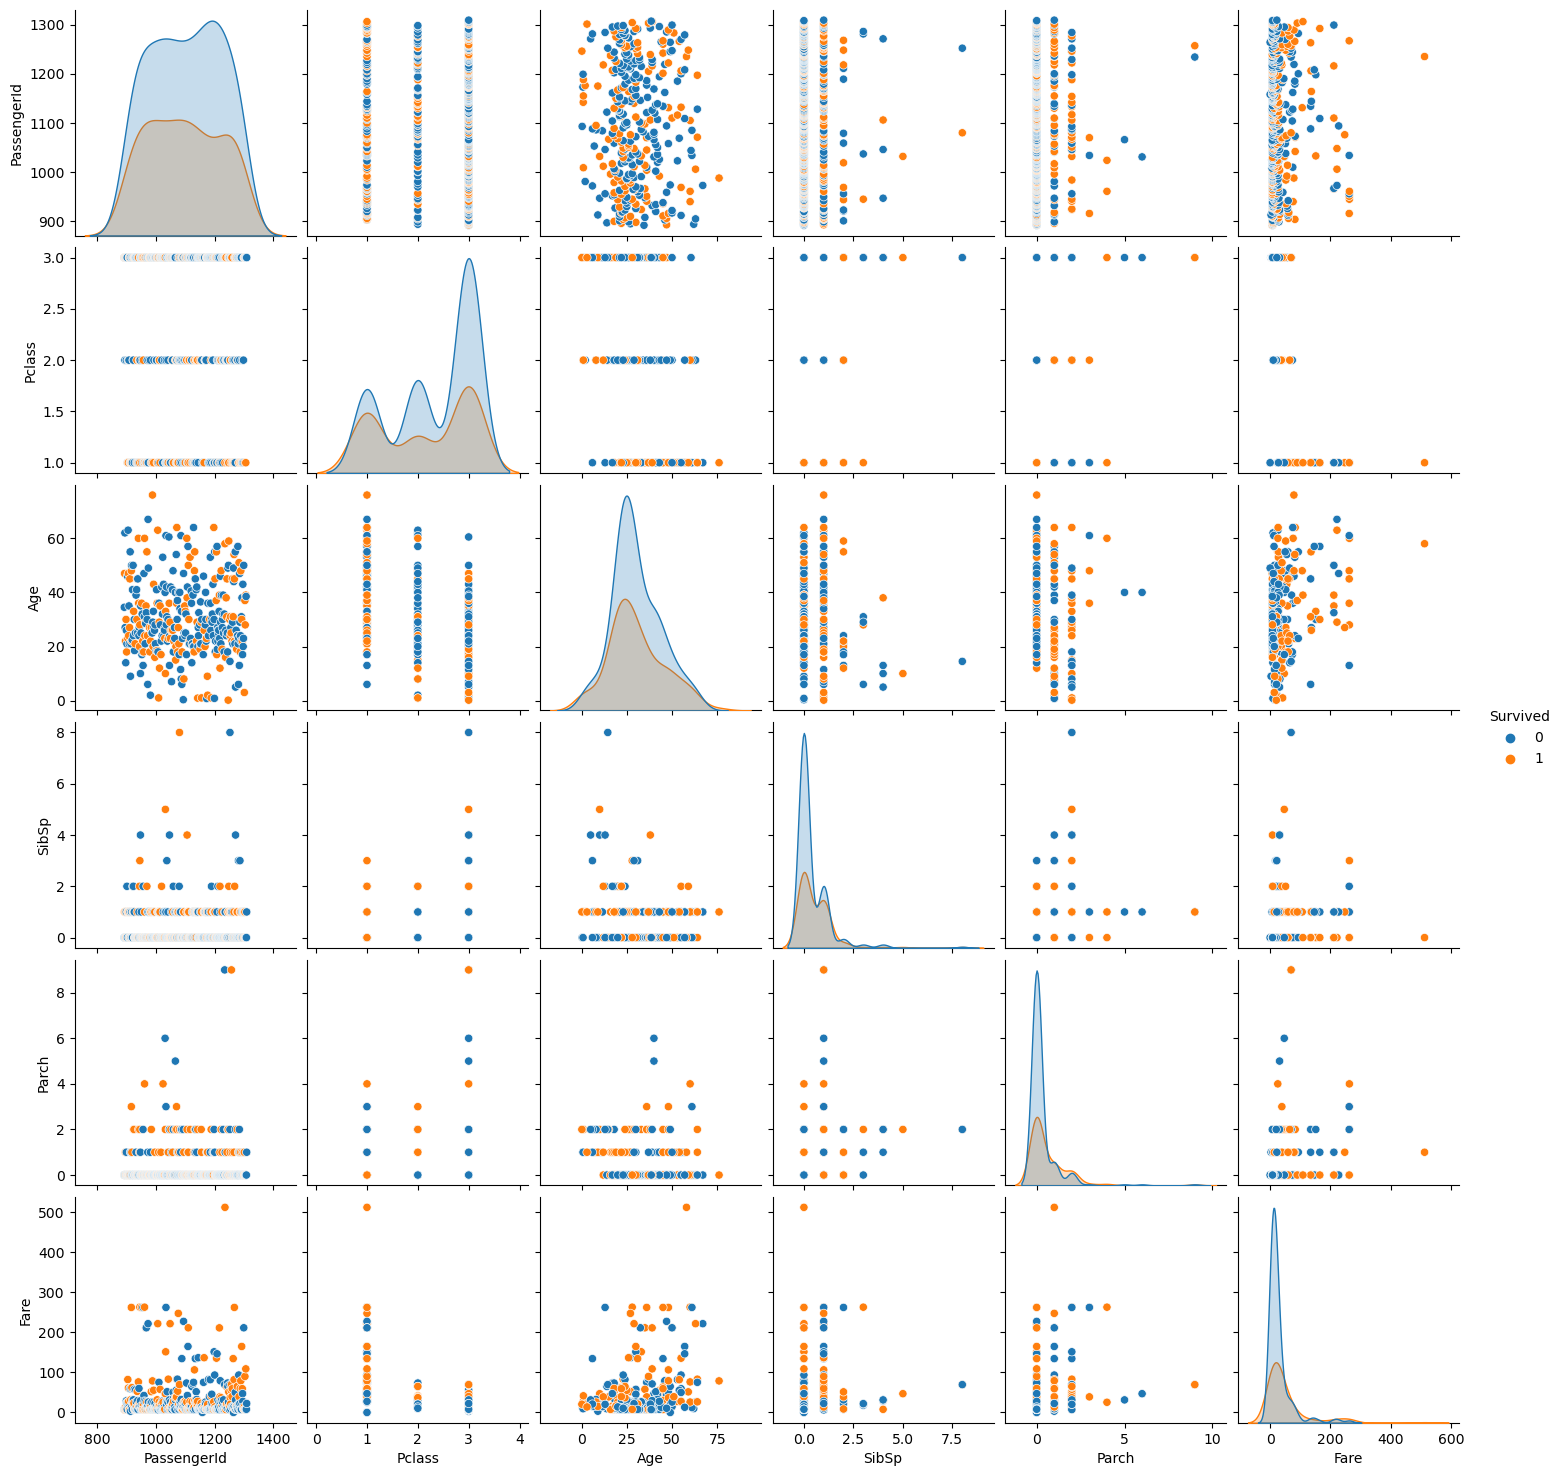

In [26]:
# pairplot of dataset and hue on survived
sns.pairplot(titanic, hue='Survived');

## Inferences

- <font color='red'>There are 418 rows and 12 columns in the dataset.</font>
- <font color='red'>There are 5 objects,5 intergers and 2 float data type in the entries.</font>
- <font color='red'>There are 414 null values in the dataset.</font>
- <font color='red'>The maximum number of siblings onboard the titanic is 8.</font>
- <font color='red'>64% of passengers are male while 36% are female.</font>
- <font color='red'>Only 36% of the passengers survived the accident,64% are dead.</font>
- <font color='red'>Most of the passengers board 3rd Class.</font>
- <font color='red'>Majority (77.5%) of the passengers were in Parch 0.</font>

## Data Preprocessing

In [27]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [28]:
# Lets drop columns PassengerId, Name, SibSp, Parch, Ticket, Cabin, and Embarked
titanic.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'], axis=1, inplace=True)

In [29]:
# Confirm the change
titanic.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,34.5,7.8292
1,1,3,female,47.0,7.0000
2,0,2,male,62.0,9.6875
3,0,3,male,27.0,8.6625
4,1,3,female,22.0,12.2875


In [30]:
# Confirm the shape of the original data
titanic.shape

(418, 5)

In [31]:
# There are null values in Age and Fare columns 
print(titanic['Age'].isnull().sum())
print(titanic['Fare'].isnull().sum())

86
1


In [32]:
# calculate the mean values for the Age and Fare columns
mean_age = titanic['Age'].mean()
mean_fare = titanic['Fare'].mean()

# Replace null values in Age and Fare columns with their respective mean values
titanic['Age'].fillna(mean_age, inplace=True)
titanic['Fare'].fillna(mean_fare, inplace=True)

In [33]:
# Lets confirm there are no more null values in Age and Fare columns
print(titanic['Age'].isnull().sum())
print(titanic['Fare'].isnull().sum())

0
0


In [34]:
# lets reaffirm the shape of the data 
titanic.shape

(418, 5)

## Feature Encoding

In [35]:
# Applying label Encoding to the species column
from sklearn.preprocessing import LabelEncoder

In [36]:
# Load The Label Encoder
label_encoder = LabelEncoder()

In [37]:
# Applying Label Encoder
titanic_labels = label_encoder.fit_transform(titanic.Sex)

In [38]:
# Lets Add New Column Called Gender To The titanic Data
titanic['Gender'] = titanic_labels

In [39]:
# lets Confirm The changes
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Gender
0,0,3,male,34.5,7.8292,1
1,1,3,female,47.0,7.0000,0
2,0,2,male,62.0,9.6875,1
3,0,3,male,27.0,8.6625,1
4,1,3,female,22.0,12.2875,0


### Note:
male=1, female=0

In [40]:
# lets drop Sex column
titanic.drop(['Sex'], axis=1, inplace=True)

In [41]:
# lets rename Survived column
titanic.rename(columns={'Survived':'Target'}, inplace=True)

In [42]:
# Lets confirm the change
titanic.head()

,Target,Pclass,Age,Fare,Gender
0,0,3,34.5,7.8292,1
1,1,3,47.0,7.0000,0
2,0,2,62.0,9.6875,1
3,0,3,27.0,8.6625,1
4,1,3,22.0,12.2875,0


## Splitting Features and Target

In [43]:
# Creating our Features
X= titanic.drop(["Target"], axis = 1)

In [44]:
# Creating Our Target
y = titanic["Target"]

In [45]:
X.head()

,Pclass,Age,Fare,Gender
0,3,34.5,7.8292,1
1,3,47.0,7.0000,0
2,2,62.0,9.6875,1
3,3,27.0,8.6625,1
4,3,22.0,12.2875,0


In [46]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: Target, dtype: int64

## Data Standardization

In [47]:
scaler = StandardScaler()

In [48]:
scaler.fit_transform(X)

array([[ 0.87348191,  0.3349926 , -0.49840706,  0.75592895],
       [ 0.87348191,  1.32553003, -0.51327429, -1.32287566],
       [-0.31581919,  2.51417495, -0.46508846,  0.75592895],
       ...,
       [ 0.87348191,  0.65196458, -0.50879189,  0.75592895],
       [ 0.87348191,  0.        , -0.4944482 ,  0.75592895],
       [ 0.87348191,  0.        , -0.23790598,  0.75592895]])

## Applying Train Test Split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, random_state = 100)

In [50]:
X.shape, X_train.shape, X_test.shape

((418, 4), (376, 4), (42, 4))

## Implementing Decision Tree Algorithm

In [51]:
model = DecisionTreeClassifier(random_state =100)
model

DecisionTreeClassifier(random_state=100)

## Train the model

In [52]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=100)

## Accuracy score

In [53]:
# Lets check the accuracy of our training data
X_train_prediction = model.predict(X_train)

In [54]:
training_data_accuracy = accuracy_score(y_train, X_train_prediction)

In [55]:
print(f" Our Training Data Accuracy is :{training_data_accuracy}")

 Our Training Data Accuracy is :1.0


In [56]:
# lets check accuracy for test data
X_test_prediction = model.predict(X_test)

In [57]:
test_data_accuracy = accuracy_score(y_test, X_test_prediction)

In [58]:
print(f"Our Test Data Accuracy Is : {test_data_accuracy}")

Our Test Data Accuracy Is : 1.0


## Building a predictive system

In [59]:
X.head(1)

,Pclass,Age,Fare,Gender
0,3,34.5,7.8292,1


In [60]:
X = [[3,34.5,7.8292,1]]
y_predict = model.predict(X)
if (y_predict[0] == 0):
    print(y_predict)
    print("The passenger is dead")
else:
    print(y_predict)
    print("The passenger is alive")

[0]
The passenger is dead


C:\Users\Akinbiyi Akinpelu\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## Confusion plot

In [61]:
# Plot Confusion
y_predict = model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
cm

array([[26,  0],
       [ 0, 16]], dtype=int64)

## Heat map for confusion matrix

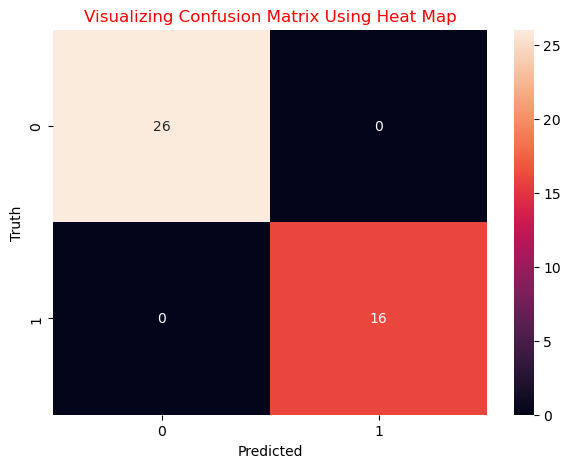

In [62]:
# Heat Map for confusion Matrix
plt.figure(figsize=(7,5))
plt.title("Visualizing Confusion Matrix Using Heat Map", color ="r")
sns.heatmap(cm, annot = True)
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

## Plotting Decision Tree

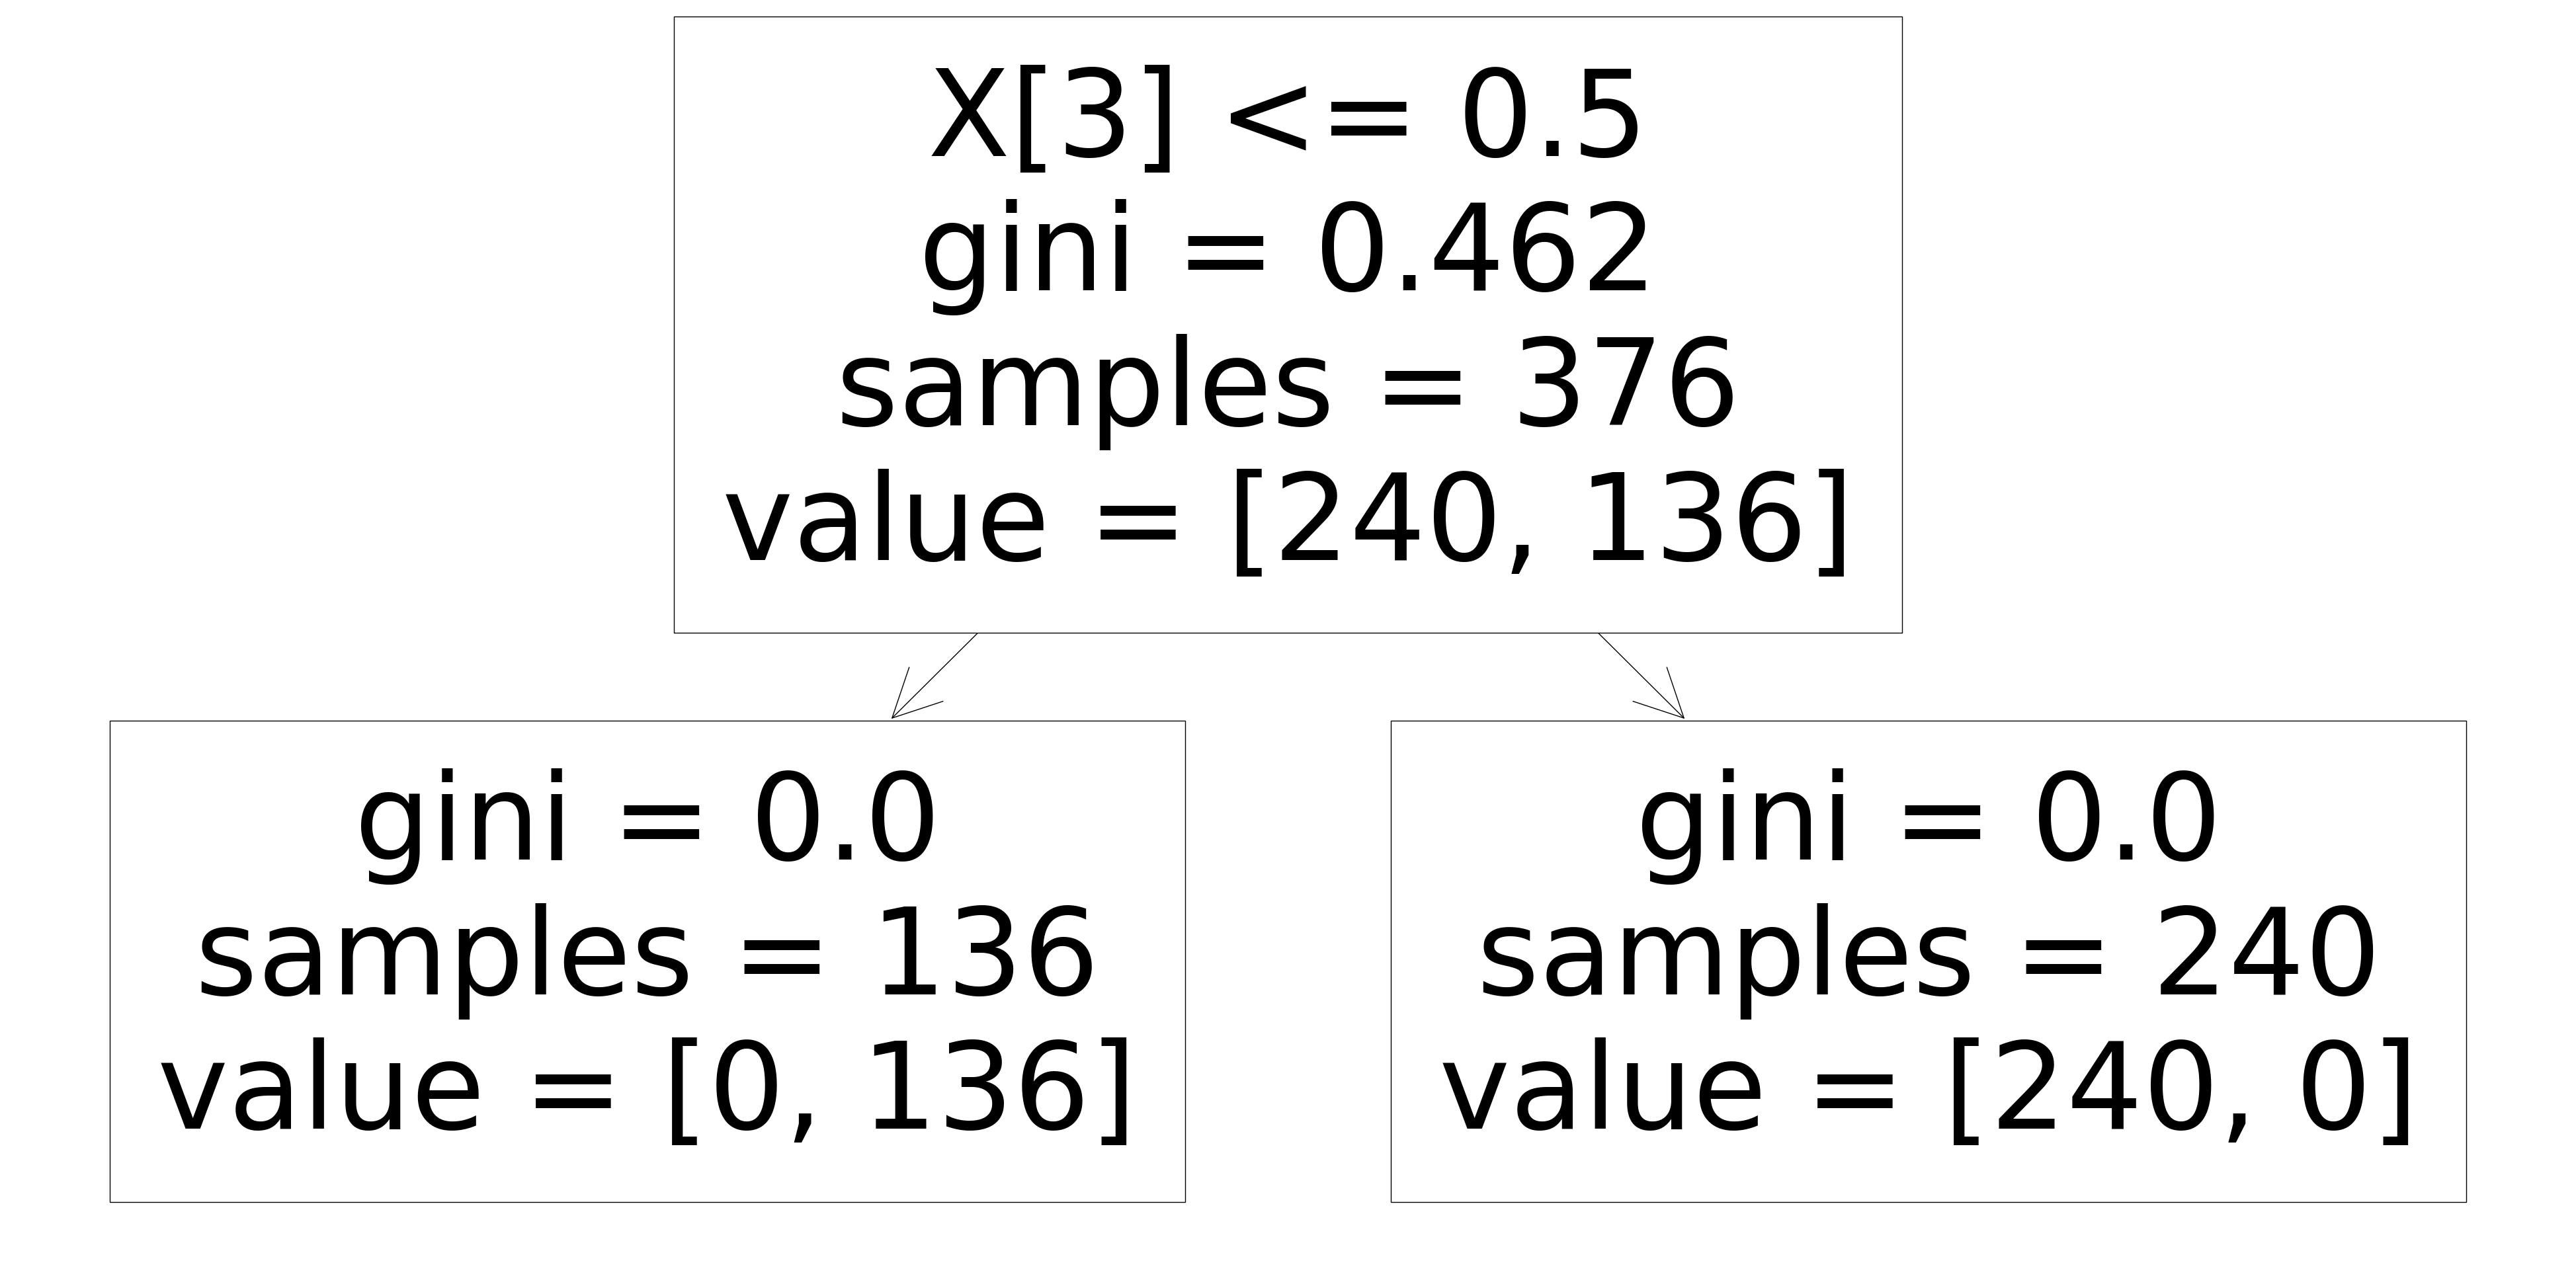

In [63]:
plt.subplots(figsize=(50,25))
tree.plot_tree(model)
plt.show()

## Text representation of Decision Tree

In [64]:
text_present = tree.export_text(model)
print(text_present)

|--- feature_3 <= 0.50
|   |--- class: 1
|--- feature_3 >  0.50
|   |--- class: 0



In [65]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        16

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42



## Conclusion

<font color='red'>The Decision Tree Classifier perfectly predict the survival of passenger on titanic dataset with 100% accuracy.</font>